# OpenCV Image Filtering Practice

This notebook demonstrates various image filtering techniques using OpenCV:
- Blurring filters (Averaging, Gaussian, Median)
- Sharpening filters
- Image comparison and saving

**Note**: This notebook is adapted for Jupyter environment with matplotlib for image display instead of cv2.imshow()

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Set matplotlib to display images inline
%matplotlib inline

print(f"OpenCV Version: {cv2.__version__}")
print(f"NumPy Version: {np.__version__}")

OpenCV Version: 4.8.1
NumPy Version: 1.24.3


In [9]:
# --- Configuration ---
image_path = r'C:\Users\pc\Desktop\90DayML\openCV\dog.jpg'  # Using available cat image
output_dir = 'output_images_day62/'  # Directory to save processed images

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")
else:
    print(f"Output directory already exists: {output_dir}")

Output directory already exists: output_images_day62/


In [10]:
# Helper function to display images using matplotlib (Jupyter-friendly)
def display_and_save(title, image, filename=None, figsize=(10, 8)):
    """
    Display image using matplotlib and optionally save it
    """
    plt.figure(figsize=figsize)
    
    # Convert BGR to RGB for matplotlib display
    if len(image.shape) == 3:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
    else:
        plt.imshow(image, cmap='gray')
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    if filename:
        full_path = os.path.join(output_dir, filename)
        cv2.imwrite(full_path, image)
        print(f"  Saved: {full_path}")

def display_comparison(title, img1, img2, label1="Original", label2="Processed", figsize=(15, 6)):
    """
    Display two images side by side for comparison
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Convert BGR to RGB for matplotlib display
    if len(img1.shape) == 3:
        img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    else:
        img1_rgb = img1
        img2_rgb = img2
    
    axes[0].imshow(img1_rgb)
    axes[0].set_title(label1, fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    axes[1].imshow(img2_rgb)
    axes[1].set_title(label2, fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 1. Load the Image

Successfully loaded image: C:\Users\pc\Desktop\90DayML\openCV\dog.jpg

Original Image Properties:
  Shape (Height, Width, Channels): (360, 552, 3)
  Data Type: uint8


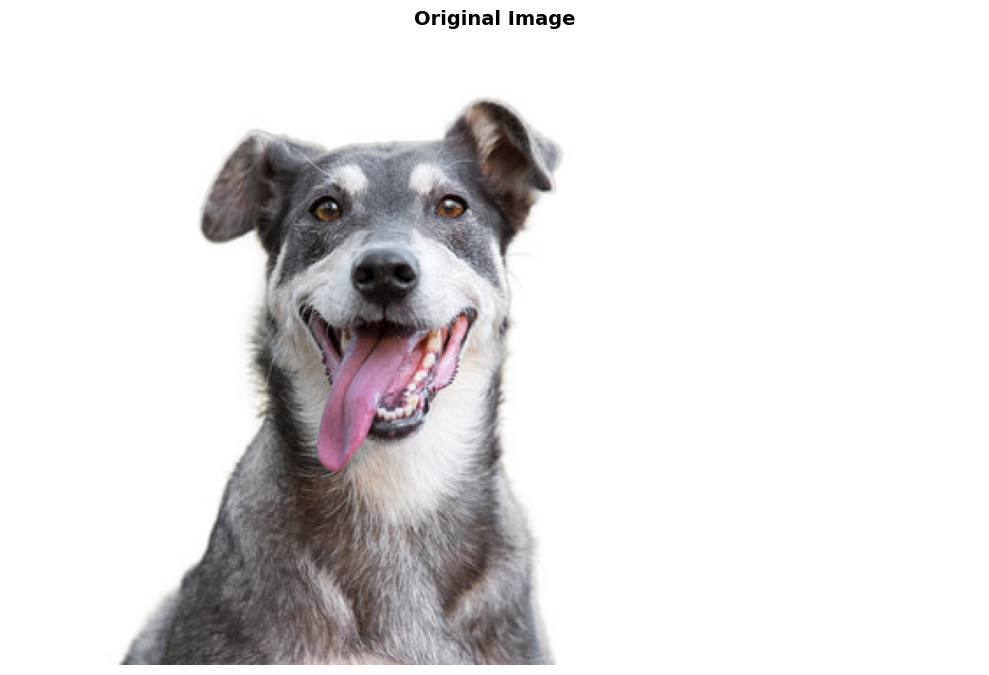

In [11]:
# --- 1. Load the Image ---
img_orig = cv2.imread(image_path)

if img_orig is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and file name.")
    print("Available images in current directory:")
    for file in os.listdir('.'):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"  - {file}")
else:
    print(f"Successfully loaded image: {image_path}")
    print(f"\nOriginal Image Properties:")
    print(f"  Shape (Height, Width, Channels): {img_orig.shape}")
    print(f"  Data Type: {img_orig.dtype}")
    
    display_and_save('Original Image', img_orig)

## 2. Blurring Filters

### 2.1 Averaging Blur (cv2.blur)
Simple box filter that replaces each pixel with the average of its neighborhood.

--- Applying Averaging Blur Filters ---


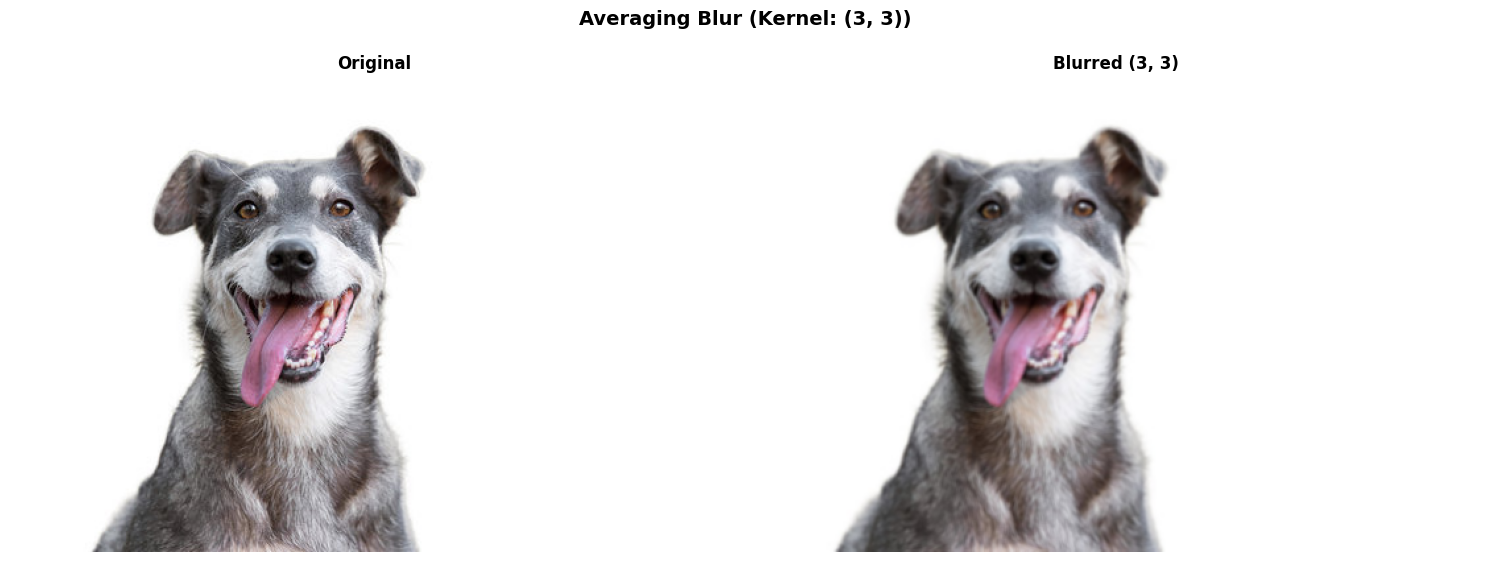

Saved: output_images_day62/blurred_avg_3x3.jpg



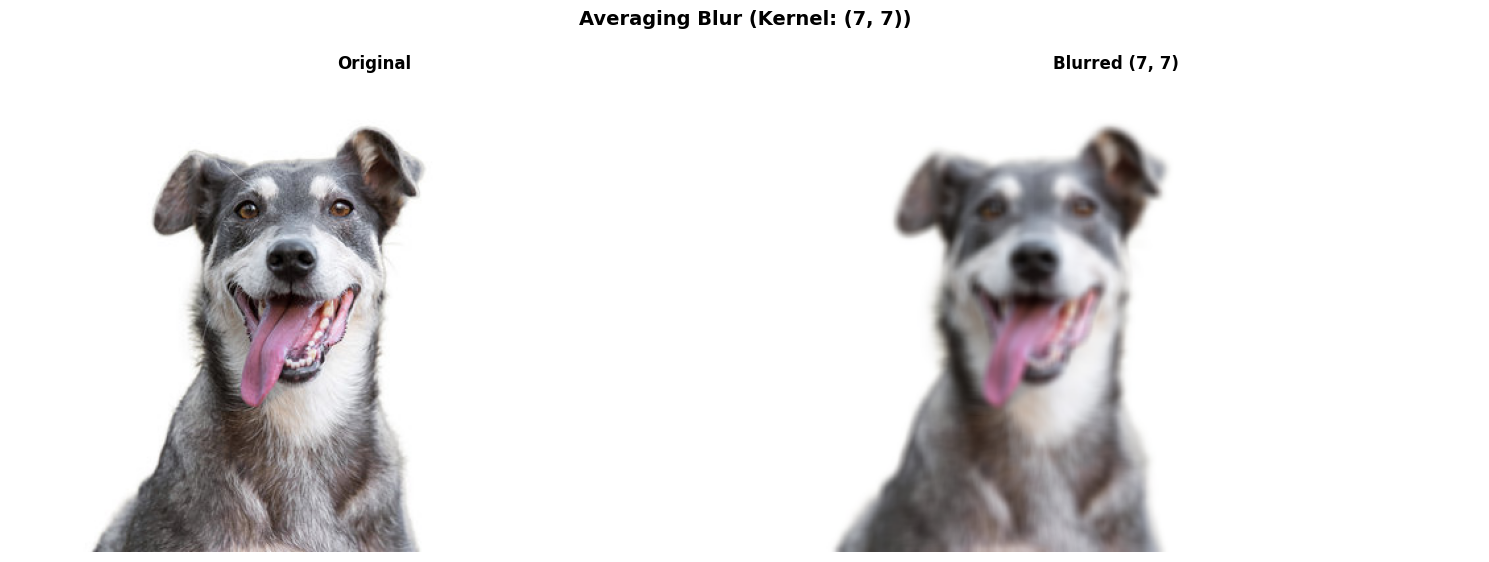

Saved: output_images_day62/blurred_avg_7x7.jpg



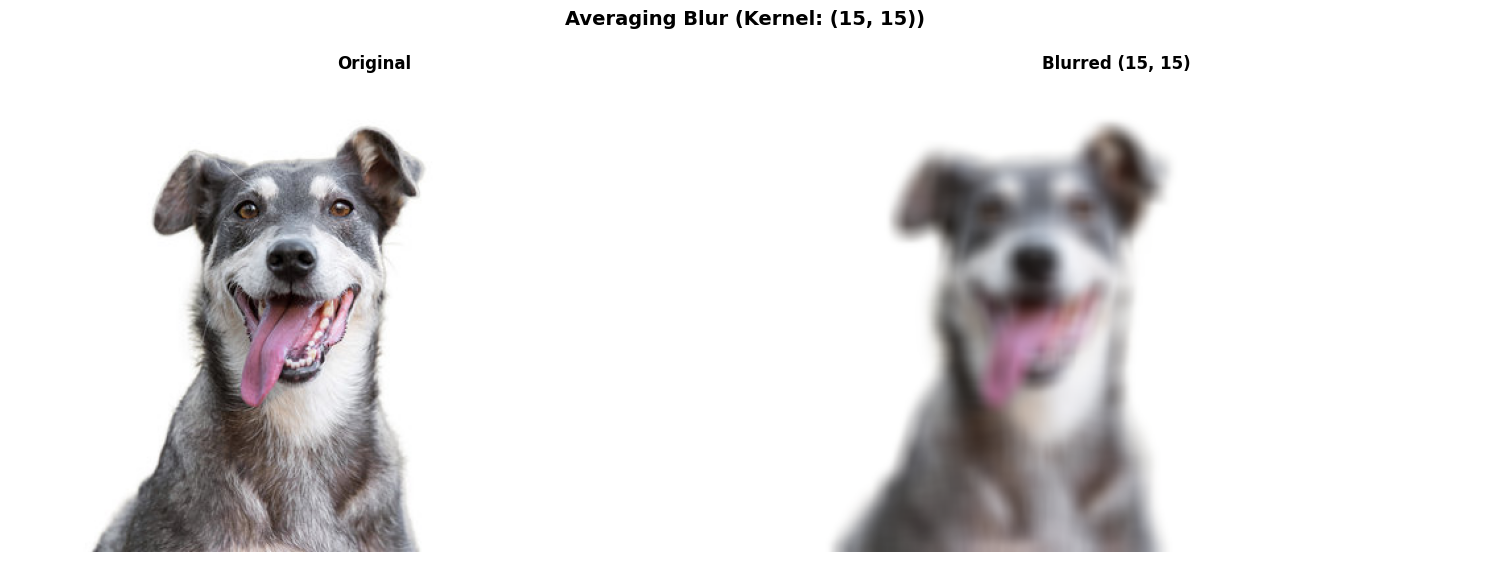

Saved: output_images_day62/blurred_avg_15x15.jpg



In [12]:
print("--- Applying Averaging Blur Filters ---")

# 2.1 Averaging Blur (cv2.blur)
# Kernel sizes to experiment with
kernel_sizes_blur = [(3, 3), (7, 7), (15, 15)]

for ksize in kernel_sizes_blur:
    blurred_avg = cv2.blur(img_orig, ksize)
    title = f'Averaging Blur (Kernel: {ksize})'
    filename = f'blurred_avg_{ksize[0]}x{ksize[1]}.jpg'
    
    display_comparison(title, img_orig, blurred_avg, "Original", f"Blurred {ksize}")
    
    # Save the processed image
    full_path = os.path.join(output_dir, filename)
    cv2.imwrite(full_path, blurred_avg)
    print(f"Saved: {full_path}\n")

### 2.2 Gaussian Blur (cv2.GaussianBlur)
Uses a Gaussian kernel for more natural-looking blur with weighted averaging.

--- Applying Gaussian Blur Filters ---


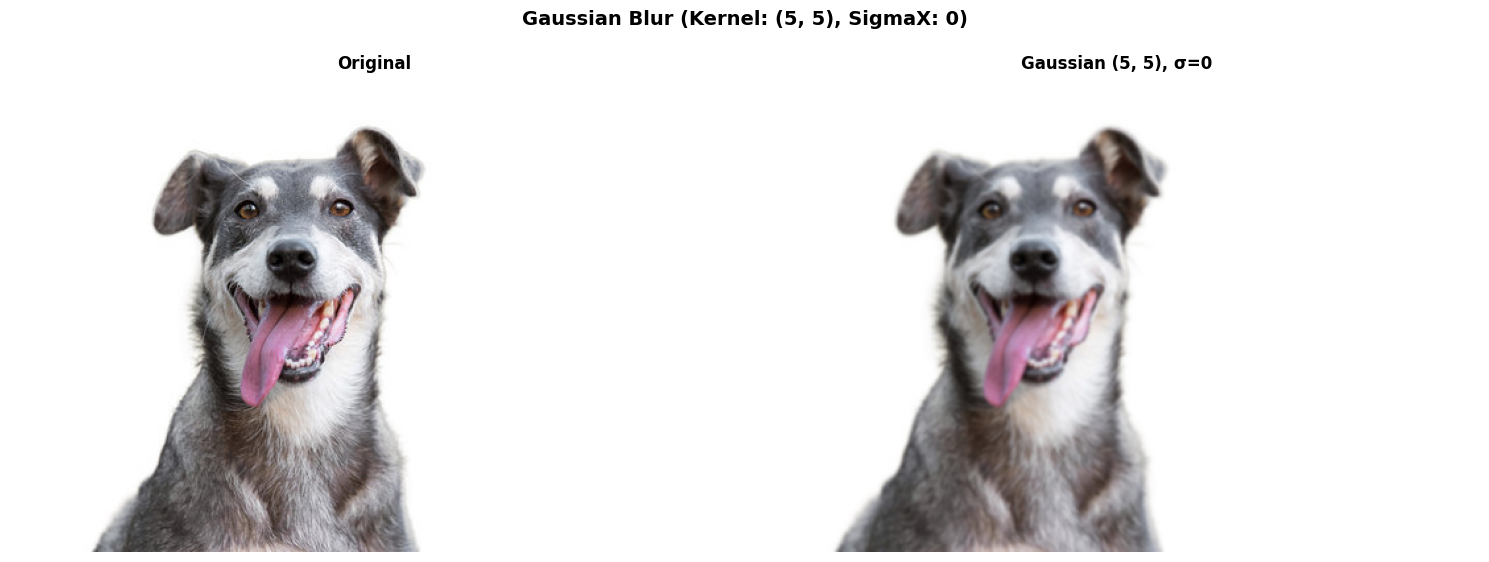

Saved: output_images_day62/blurred_gaussian_5x5_s0.jpg



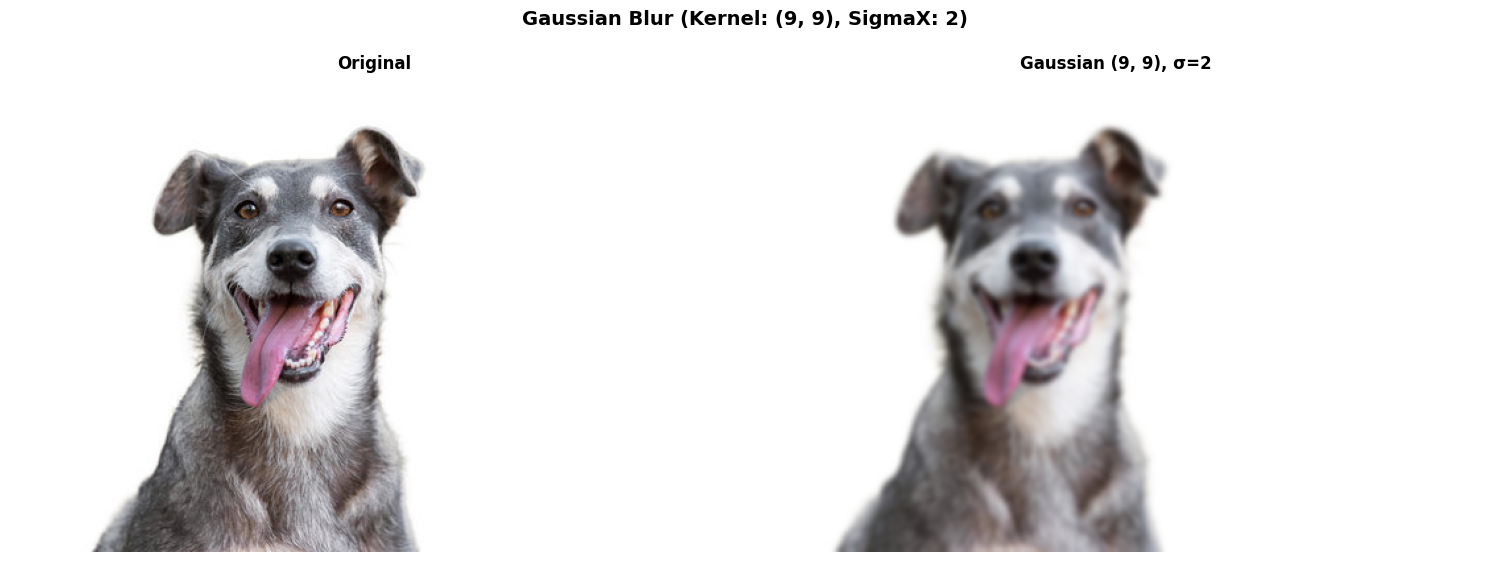

Saved: output_images_day62/blurred_gaussian_9x9_s2.jpg



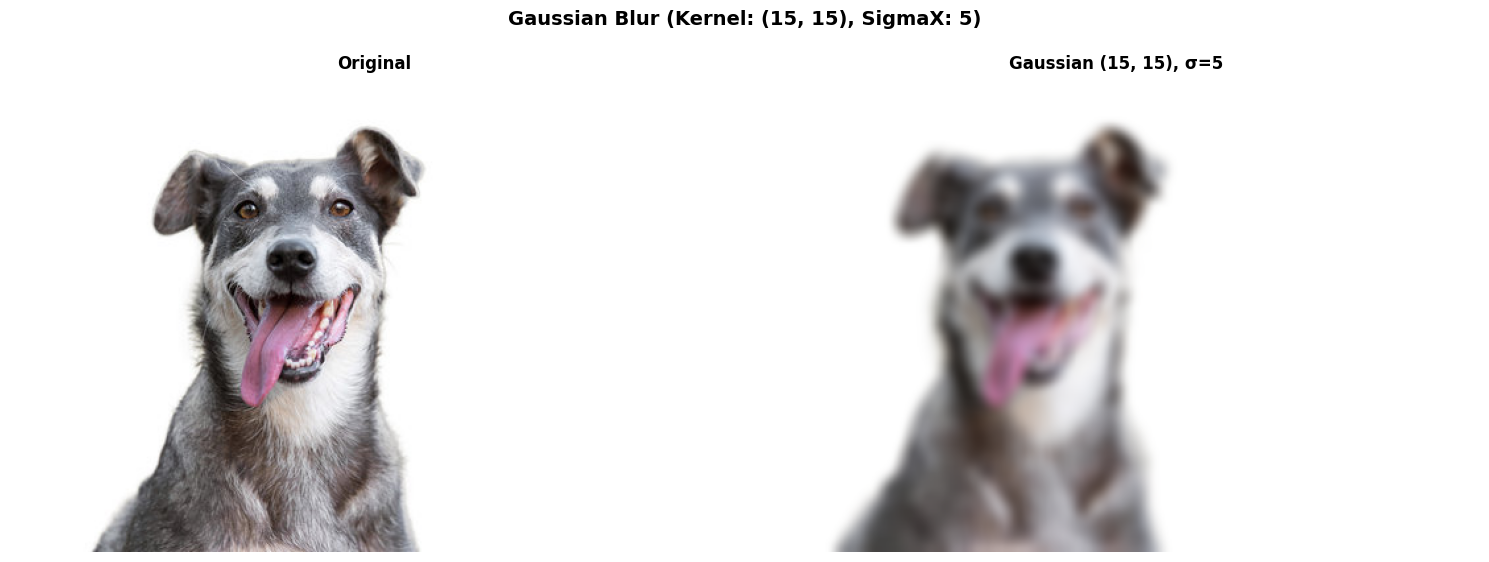

Saved: output_images_day62/blurred_gaussian_15x15_s5.jpg



In [13]:
print("--- Applying Gaussian Blur Filters ---")

# 2.2 Gaussian Blur (cv2.GaussianBlur)
# Kernel sizes and sigmaX to experiment with
gaussian_params = [((5, 5), 0), ((9, 9), 2), ((15, 15), 5)]  # (ksize, sigmaX)

for ksize, sigmaX in gaussian_params:
    blurred_gaussian = cv2.GaussianBlur(img_orig, ksize, sigmaX)
    title = f'Gaussian Blur (Kernel: {ksize}, SigmaX: {sigmaX})'
    filename = f'blurred_gaussian_{ksize[0]}x{ksize[1]}_s{sigmaX}.jpg'
    
    display_comparison(title, img_orig, blurred_gaussian, "Original", f"Gaussian {ksize}, σ={sigmaX}")
    
    # Save the processed image
    full_path = os.path.join(output_dir, filename)
    cv2.imwrite(full_path, blurred_gaussian)
    print(f"Saved: {full_path}\n")

### 2.3 Median Blur (cv2.medianBlur)
Excellent for removing salt-and-pepper noise. Let's first add some noise to demonstrate its effectiveness.

--- Creating Noisy Image for Median Blur Demo ---


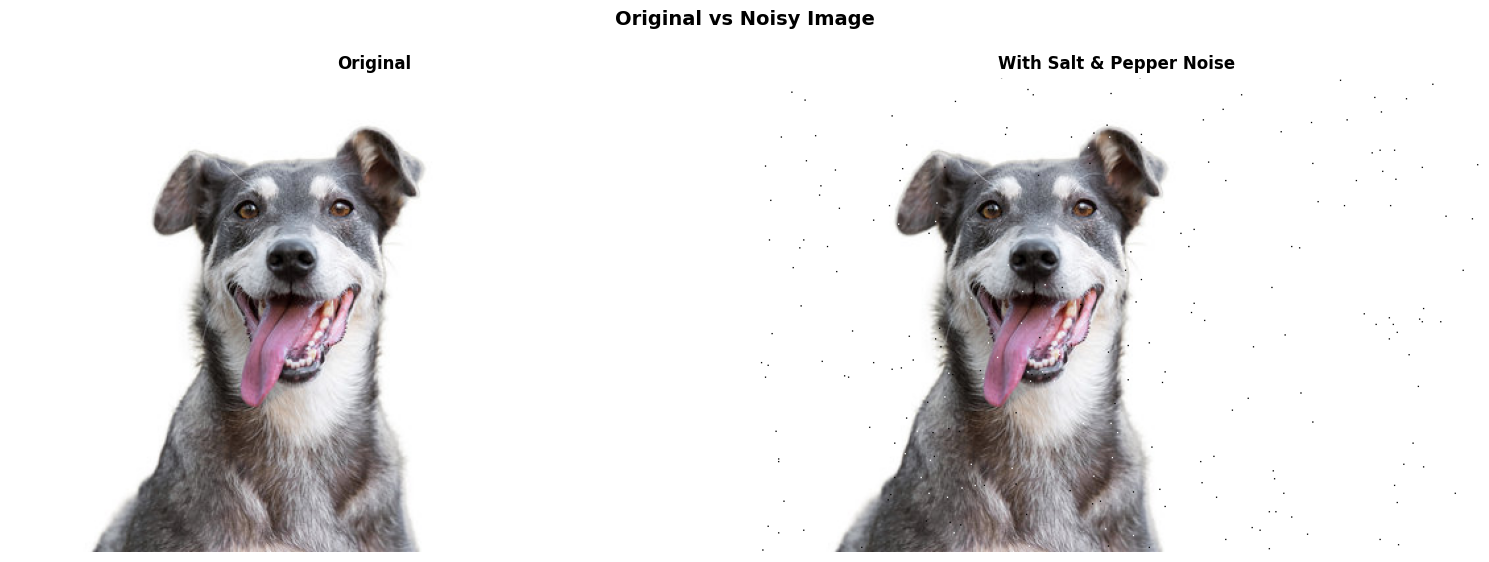

Saved: output_images_day62/original_noisy.jpg


In [14]:
print("--- Creating Noisy Image for Median Blur Demo ---")

# 2.3 Median Blur (cv2.medianBlur)
# Good for salt-and-pepper noise; ksize must be odd
kernel_sizes_median = [3, 5, 9]

# Add some simulated salt-and-pepper noise to original image for better demo
noisy_img = img_orig.copy()

# Add salt-and-pepper noise (basic implementation for demo)
num_salt = int(0.001 * img_orig.shape[0] * img_orig.shape[1])  # 0.1% salt noise
coords = [np.random.randint(0, i - 1, num_salt) for i in img_orig.shape[:2]]
noisy_img[coords[0], coords[1]] = [255, 255, 255]  # Salt (white pixels)

num_pepper = int(0.001 * img_orig.shape[0] * img_orig.shape[1])  # 0.1% pepper noise
coords = [np.random.randint(0, i - 1, num_pepper) for i in img_orig.shape[:2]]
noisy_img[coords[0], coords[1]] = [0, 0, 0]  # Pepper (black pixels)

display_comparison('Original vs Noisy Image', img_orig, noisy_img, "Original", "With Salt & Pepper Noise")

# Save noisy image
cv2.imwrite(os.path.join(output_dir, 'original_noisy.jpg'), noisy_img)
print(f"Saved: {os.path.join(output_dir, 'original_noisy.jpg')}")

--- Applying Median Blur Filters ---


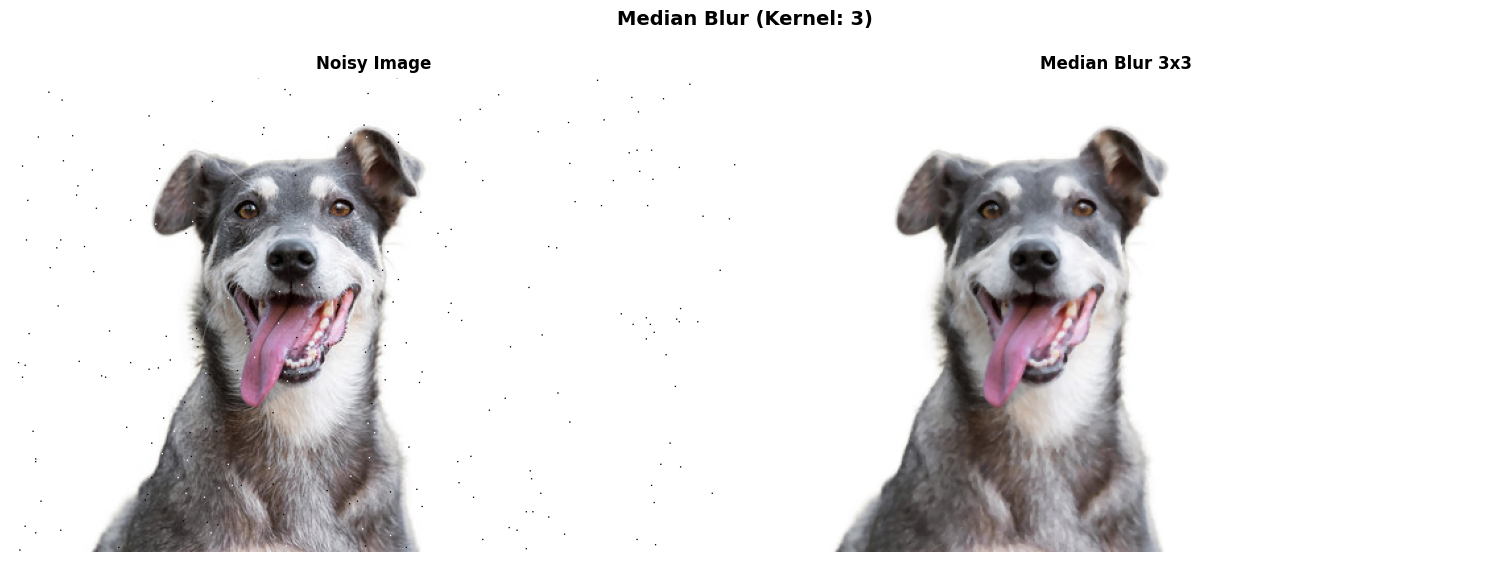

Saved: output_images_day62/blurred_median_3.jpg



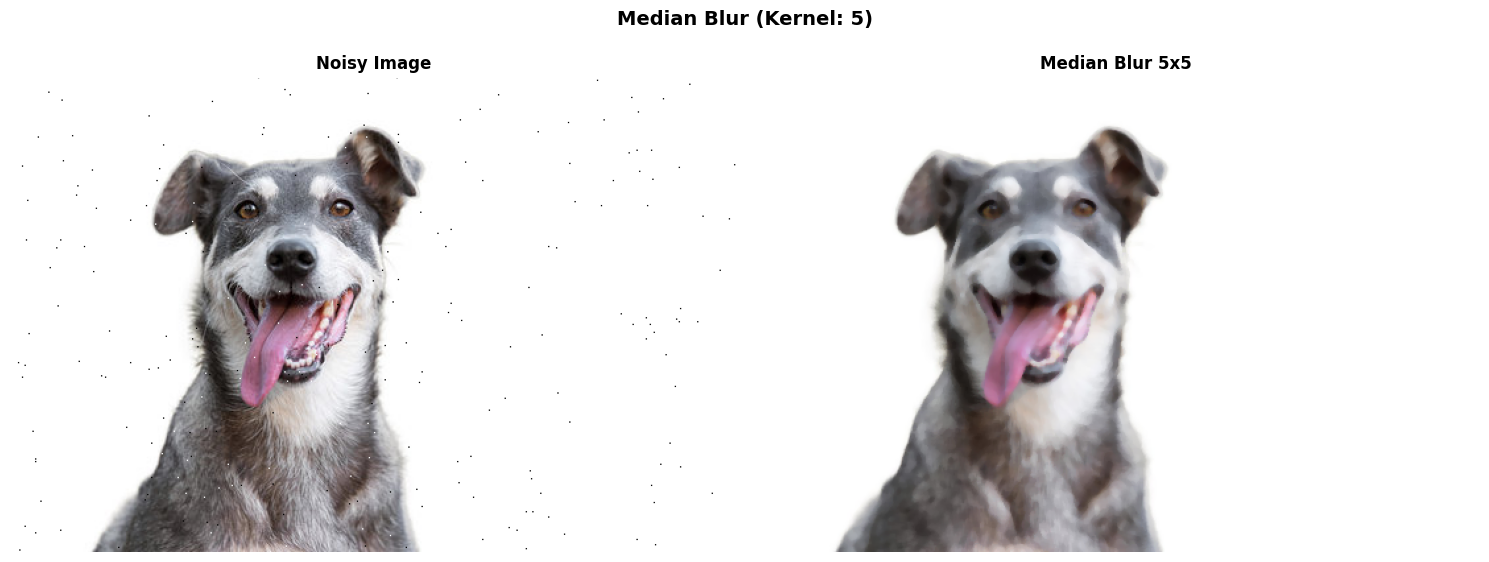

Saved: output_images_day62/blurred_median_5.jpg



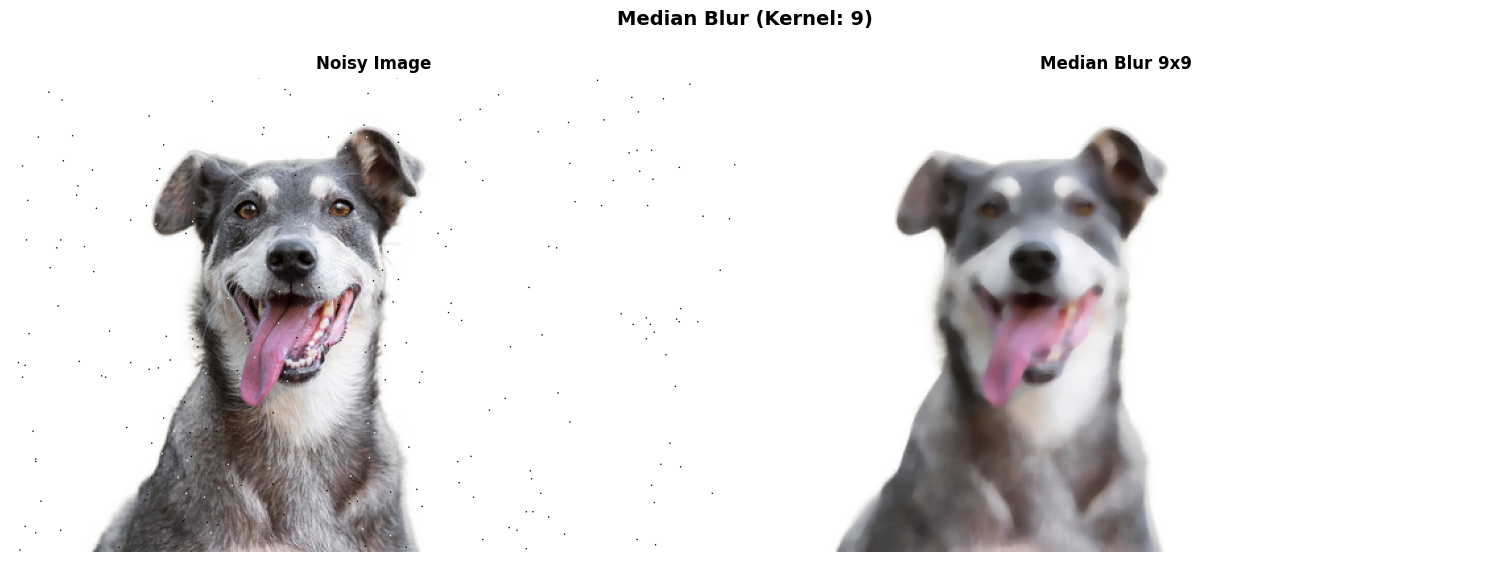

Saved: output_images_day62/blurred_median_9.jpg



In [15]:
print("--- Applying Median Blur Filters ---")

for ksize in kernel_sizes_median:
    blurred_median = cv2.medianBlur(noisy_img, ksize)
    title = f'Median Blur (Kernel: {ksize})'
    filename = f'blurred_median_{ksize}.jpg'
    
    display_comparison(title, noisy_img, blurred_median, "Noisy Image", f"Median Blur {ksize}x{ksize}")
    
    # Save the processed image
    full_path = os.path.join(output_dir, filename)
    cv2.imwrite(full_path, blurred_median)
    print(f"Saved: {full_path}\n")

## 3. Sharpening Filters

Using `cv2.filter2D` with custom kernels to enhance edges and details.

--- Applying Sharpening Filter ---
Sharpening Kernel:
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


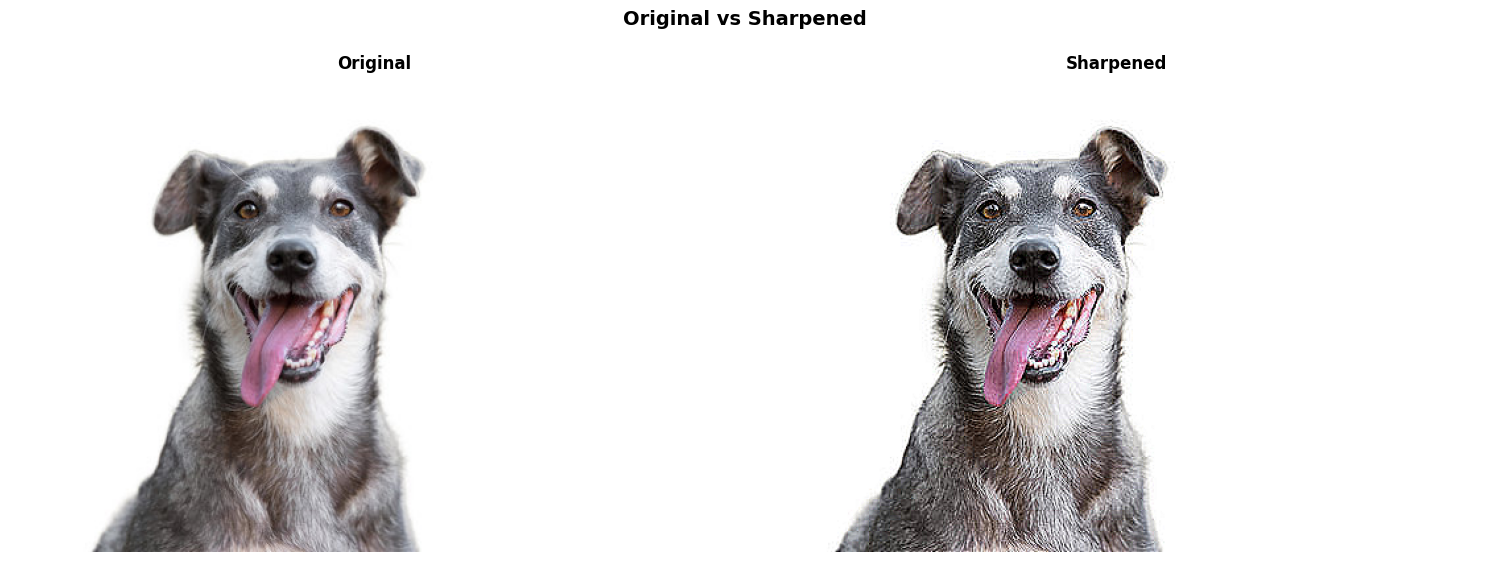

Saved: output_images_day62/sharpened_image.jpg


In [16]:
print("--- Applying Sharpening Filter ---")

# Define a sharpening kernel
# This kernel enhances the center pixel relative to its neighbors
sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)  # Use float32 for kernel to allow negative values

print("Sharpening Kernel:")
print(sharpen_kernel)

# Apply the sharpening filter
# ddepth = -1 means the output image will have the same depth as the input
sharpened_img = cv2.filter2D(img_orig, -1, sharpen_kernel)

display_comparison('Original vs Sharpened', img_orig, sharpened_img, "Original", "Sharpened")

# Save sharpened image
cv2.imwrite(os.path.join(output_dir, 'sharpened_image.jpg'), sharpened_img)
print(f"Saved: {os.path.join(output_dir, 'sharpened_image.jpg')}")

### Alternative Sharpening Kernel

Let's try a more aggressive sharpening kernel for comparison.

Aggressive Sharpening Kernel:
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


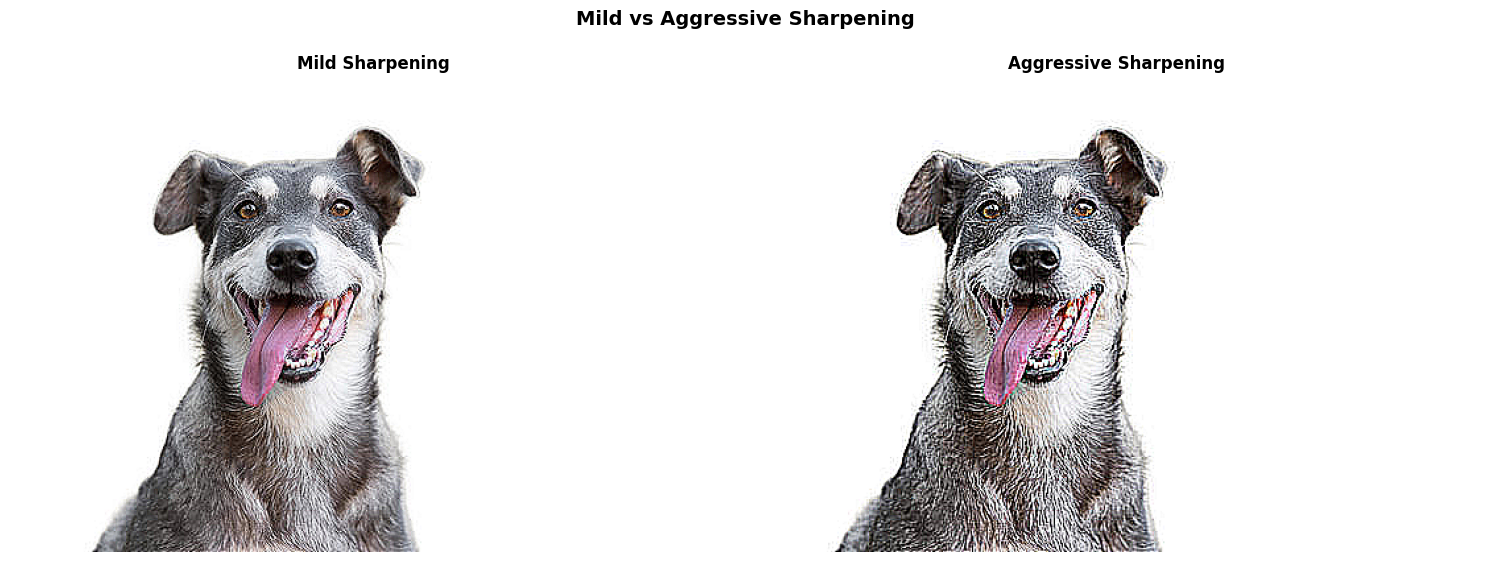

Saved: output_images_day62/sharpened_aggressive.jpg


In [17]:
# Another common sharpening kernel (more aggressive)
sharpen_kernel_aggressive = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
], dtype=np.float32)

print("Aggressive Sharpening Kernel:")
print(sharpen_kernel_aggressive)

# Apply the aggressive sharpening filter
sharpened_aggressive = cv2.filter2D(img_orig, -1, sharpen_kernel_aggressive)

display_comparison('Mild vs Aggressive Sharpening', sharpened_img, sharpened_aggressive, 
                  "Mild Sharpening", "Aggressive Sharpening")

# Save aggressive sharpened image
cv2.imwrite(os.path.join(output_dir, 'sharpened_aggressive.jpg'), sharpened_aggressive)
print(f"Saved: {os.path.join(output_dir, 'sharpened_aggressive.jpg')}")

## 4. Final Comparison

Let's create a comprehensive comparison showing the original image alongside different processing techniques.

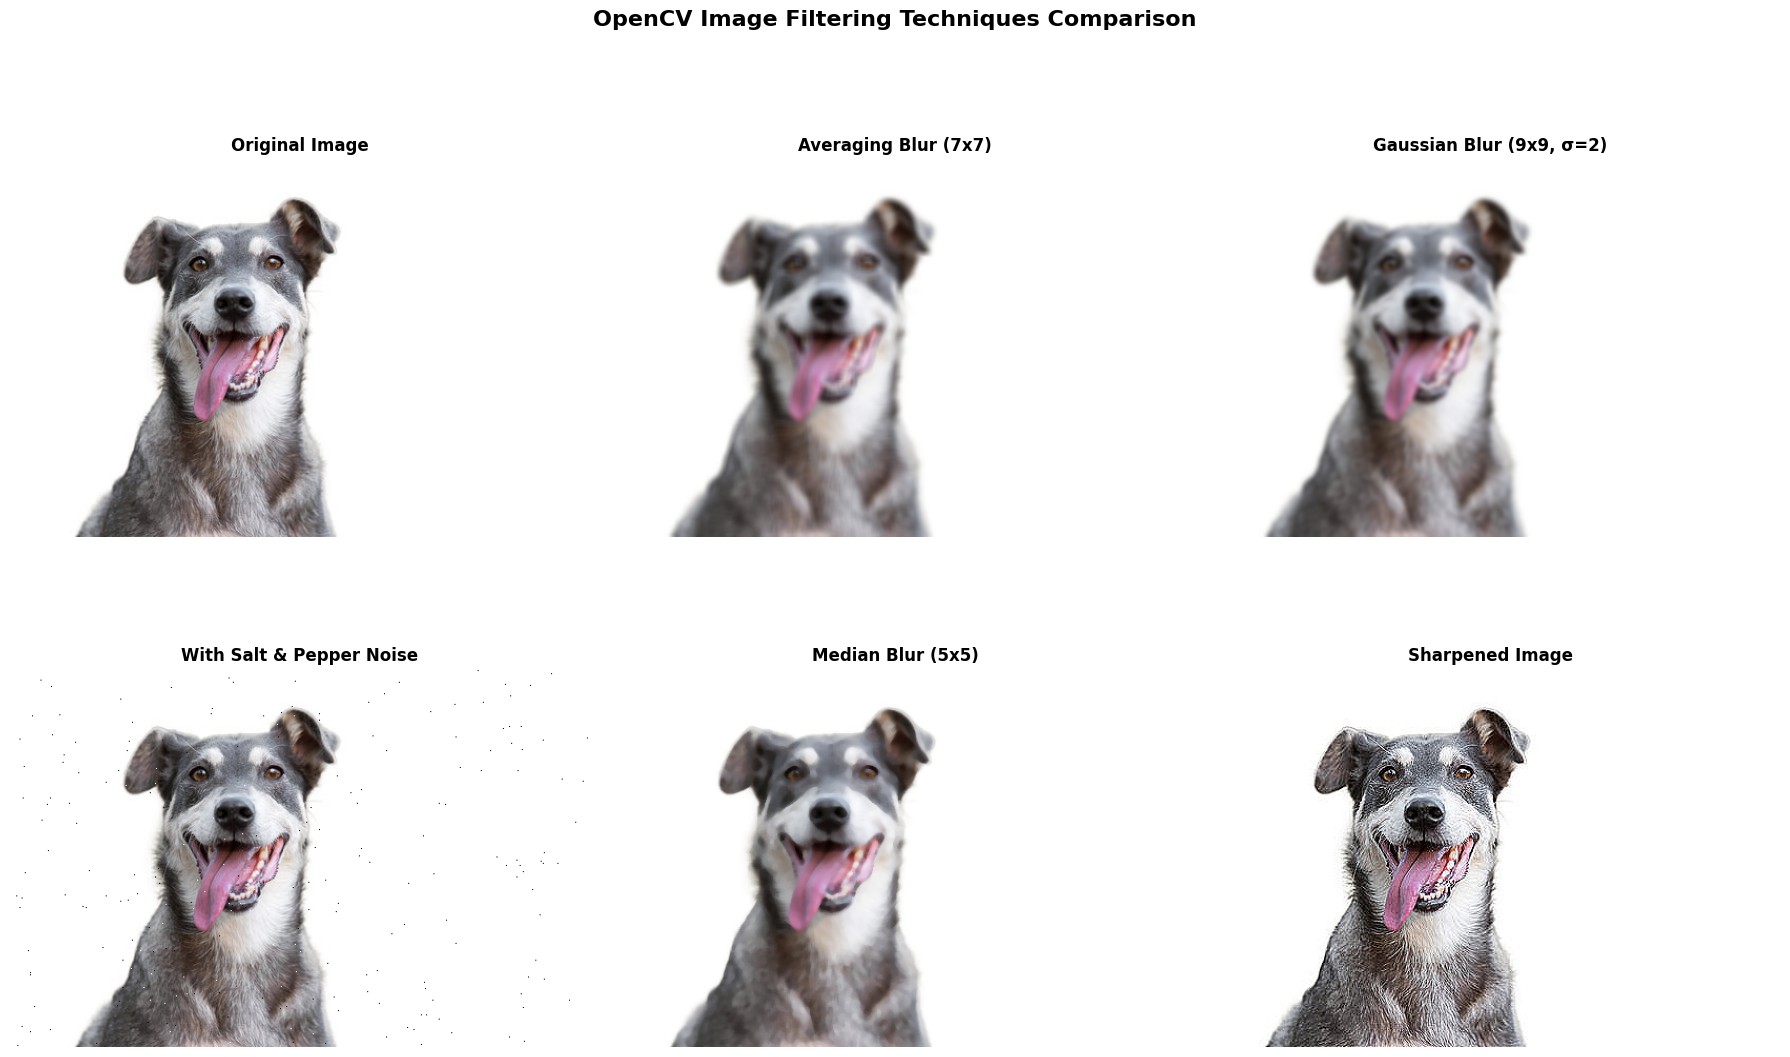


--- All image filtering tasks demonstrated successfully! ---
All processed images have been saved to: output_images_day62/


In [18]:
# Create a comprehensive comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Convert all images to RGB for display
img_orig_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
blurred_avg_rgb = cv2.cvtColor(cv2.blur(img_orig, (7, 7)), cv2.COLOR_BGR2RGB)
blurred_gaussian_rgb = cv2.cvtColor(cv2.GaussianBlur(img_orig, (9, 9), 2), cv2.COLOR_BGR2RGB)
blurred_median_rgb = cv2.cvtColor(cv2.medianBlur(noisy_img, 5), cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
noisy_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)

# Display images
axes[0, 0].imshow(img_orig_rgb)
axes[0, 0].set_title('Original Image', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred_avg_rgb)
axes[0, 1].set_title('Averaging Blur (7x7)', fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(blurred_gaussian_rgb)
axes[0, 2].set_title('Gaussian Blur (9x9, σ=2)', fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(noisy_rgb)
axes[1, 0].set_title('With Salt & Pepper Noise', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(blurred_median_rgb)
axes[1, 1].set_title('Median Blur (5x5)', fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(sharpened_rgb)
axes[1, 2].set_title('Sharpened Image', fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle('OpenCV Image Filtering Techniques Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n--- All image filtering tasks demonstrated successfully! ---")
print(f"All processed images have been saved to: {output_dir}")

## Summary

This notebook demonstrated various OpenCV image filtering techniques:

1. **Averaging Blur**: Simple box filter for basic smoothing
2. **Gaussian Blur**: Weighted averaging with Gaussian kernel for natural-looking blur
3. **Median Blur**: Excellent for removing salt-and-pepper noise
4. **Sharpening Filters**: Custom kernels to enhance edges and details

### Key Takeaways:
- Different blur techniques serve different purposes
- Kernel size affects the intensity of the effect
- Median blur is particularly effective for noise removal
- Sharpening can enhance details but may also amplify noise

### Next Steps:
Try experimenting with:
- Different kernel sizes
- Custom kernels for edge detection
- Combining multiple filters
- Different input images (try changing `image_path` to 'dog.jpg')